In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. Risk Score 생성 (평균 동맥압 기반)
df['Risk Score'] = (df['Derived_MAP'] - df['Derived_MAP'].min()) / \
                   (df['Derived_MAP'].max() - df['Derived_MAP'].min()) * 100

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df['Risk Score']

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 머신러닝 모델 학습 (랜덤 포레스트 회귀) - 하이퍼파라미터 튜닝 적용
model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행
cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return round(prediction, 2)

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_score = predict_risk(sample_data)
print(f"🔍 예측된 건강 위험도: {predicted_score}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\2325240065.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.00
RMSE: 0.00
R² Score: 1.00
교차 검증 R² Score 평균: 1.00
🔍 예측된 건강 위험도: 52.24%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. Risk Score 생성 (평균 동맥압 기반)
df['Risk Score'] = (df['Derived_MAP'] - df['Derived_MAP'].min()) / \
                   (df['Derived_MAP'].max() - df['Derived_MAP'].min()) * 100

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df['Risk Score']

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 머신러닝 모델 학습 (XGBoost 회귀) - 하이퍼파라미터 튜닝 적용
model = XGBRegressor(
    n_estimators=100, 
    max_depth=10, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행
cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return round(prediction, 2)

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_score = predict_risk(sample_data)
print(f"🔍 예측된 건강 위험도: {predicted_score}%")


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (예제 계산 공식 적용 & 0~100% 범위로 제한)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 0, 100)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 0, 100)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 0, 100)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 0, 100)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 머신러닝 모델 학습 (XGBoost 회귀) - 다중 질병 위험 예측 적용
model = XGBRegressor(
    n_estimators=100, 
    max_depth=10, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행
cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 새로운 데이터 예측 함수 (출력값 0~100%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction, 0, 100)  # 0~100%로 제한

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 13. 질병별 위험도 출력
risk_labels = ['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']
print("🔍 예측된 건강 위험도:")
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\4032315751.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.27
RMSE: 0.29
R² Score: 0.50
교차 검증 R² Score 평균: 0.50
🔍 예측된 건강 위험도:
Diabetes Risk: 99.77%
Hyperlipidemia Risk: 99.77%
Obesity Risk: 30.52%
Hypertension Risk: 0.69%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (0~100% 범위로 제한)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 0, 100)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 0, 100)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 0, 100)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 0, 100)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 머신러닝 모델 학습 (XGBoost 회귀 - 다중 질병 위험 예측 적용)
model = XGBRegressor(
    n_estimators=150, 
    max_depth=8, 
    learning_rate=0.03, 
    subsample=0.7, 
    colsample_bytree=0.7, 
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행
cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 새로운 데이터 예측 함수 (출력값 0~100%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction, 0, 100)  # 0~100%로 제한

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 13. 질병별 위험도 출력
risk_labels = ['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']
print("🔍 예측된 건강 위험도:")
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\412432475.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.48
RMSE: 0.52
R² Score: 0.50
교차 검증 R² Score 평균: 0.50
🔍 예측된 건강 위험도:
Diabetes Risk: 99.59%
Hyperlipidemia Risk: 99.59%
Obesity Risk: 30.13%
Hypertension Risk: 1.17%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\3714159464.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.26
RMSE: 0.54
R² Score: 1.00


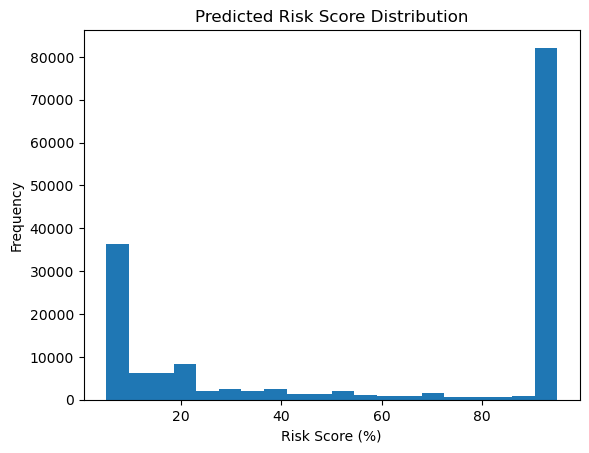

🔍 예측된 건강 위험도:
Diabetes Risk: 95.00%
Hyperlipidemia Risk: 95.00%
Obesity Risk: 32.00%
Hypertension Risk: 5.14%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = False  # 필요하면 True로 변경

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (0~100% 범위로 제한)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 5, 95)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 5, 95)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 5, 95)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 5, 95)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용)
model = RandomForestRegressor(
    n_estimators=150, 
    max_depth=7,  # 깊이 감소하여 과적합 방지
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행 (속도 개선 - 비활성화 가능)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=3, scoring='r2', n_jobs=-1)  # cv=3으로 속도 개선
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 예측값 분포 시각화
plt.hist(Y_pred.flatten(), bins=20)
plt.title("Predicted Risk Score Distribution")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수 (출력값 5~95%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction, 5, 95)  # 5~95%로 조정

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
risk_labels = ['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']
print("🔍 예측된 건강 위험도:")
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (10~90% 범위)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 10, 90)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 10, 90)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 10, 90)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 10, 90)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]

Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화 (MinMaxScaler 적용)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 질병별 개별 모델 학습 (XGBoost 회귀) + 과적합 방지
models = {}
feature_importances = {}

for disease in Y.columns:
    model = XGBRegressor(
        n_estimators=100,  # 트리 개수 줄이기 (200 → 100)
        max_depth=4,  # 깊이 축소 (8 → 4)
        learning_rate=0.08,  # 학습률 증가 (0.03 → 0.08)
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    
    # 5-Fold 교차 검증 적용 (Y_train[disease]를 1D array로 변환)
    scores = cross_val_score(model, X_train, Y_train[disease].values.ravel(), cv=5, scoring='r2')
    print(f"📊 {disease} 모델 교차 검증 R² 점수: {scores.mean():.4f} ± {scores.std():.4f}")

    # 최종 학습
    model.fit(
        X_train, Y_train[disease].values.ravel(),  # DataFrame → 1D array 변환
        eval_set=[(X_test, Y_test[disease].values.ravel())], 
        eval_metric="rmse",  # 평가 지표 설정 (RMSE 사용)
        early_stopping_rounds=10, 
        verbose=10  # 10 라운드마다 로그 출력
    )
    
    models[disease] = model
    feature_importances[disease] = model.feature_importances_

# ✅ 8. 예측 수행
Y_pred = pd.DataFrame({disease: models[disease].predict(X_test) for disease in Y.columns})

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

print("\n✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ✅ 10. Feature Importance 출력
for disease in Y.columns:
    print(f"\n🔍 {disease}의 주요 특징 변수 중요도:")
    sorted_idx = np.argsort(feature_importances[disease])[::-1]
    for idx in sorted_idx:
        print(f"- {X.columns[idx]}: {feature_importances[disease][idx]:.4f}")

# ✅ 11. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = {disease: np.clip(models[disease].predict(new_data_scaled)[0], 10, 90) for disease in Y.columns}
    return prediction

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 13. 질병별 위험도 출력
print("\n🔍 예측된 건강 위험도:")
for label, risk in predicted_risks.items():
    print(f"{label}: {risk:.2f}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\2035414536.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


📊 Diabetes Risk 모델 교차 검증 R² 점수: 1.0000 ± 0.0000


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\968151492.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.26
RMSE: 0.62
R² Score: 0.97
교차 검증 R² Score 평균: 0.98


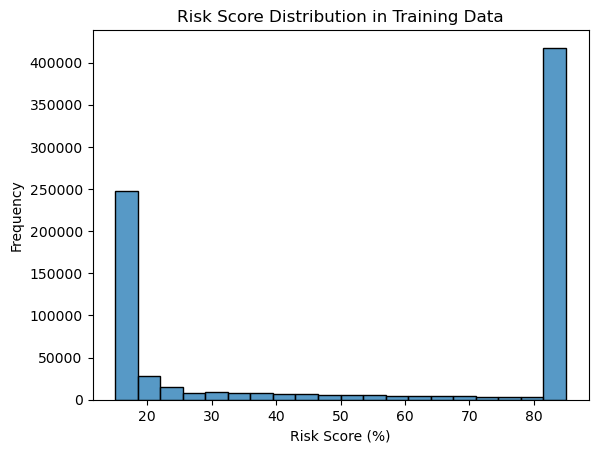

🔍 예측된 건강 위험도:
Diabetes Risk: 82.25%
Hyperlipidemia Risk: 82.25%
Obesity Risk: 37.74%
Hypertension Risk: 22.83%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (15~85% 범위로 제한, 극단적 값 방지)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 15, 85)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 15, 85)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 15, 85)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 15, 85)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=200,  # 부트스트랩 샘플링 증가
    max_depth=5,  # 깊이 감소하여 과적합 방지
    min_samples_split=15,  # 분할 최소 샘플 증가
    min_samples_leaf=7,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행 (속도 개선 - 일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=3, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 데이터 분포 시각화 (편향 확인)
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수 (출력값 15~85%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.85 + 10, 15, 85)  # 15~85% 범위로 조정

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (12~88% 범위로 조정, 극단적 값 방지)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 12, 88)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 12, 88)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 12, 88)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 12, 88)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. 데이터 불균형 해결 (SMOTE 적용)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# ✅ 8. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=200,  # 부트스트랩 샘플링 증가
    max_depth=6,  # 깊이 증가하여 중간 범위 데이터 학습 향상
    min_samples_split=20,  # 분할 최소 샘플 증가
    min_samples_leaf=10,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train_resampled, Y_train_resampled)

# ✅ 9. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 10. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 11. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=3, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 12. 데이터 분포 시각화 (편향 확인)
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 13. 새로운 데이터 예측 함수 (출력값 12~88%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.9 + 7, 12, 88)  # 12~88% 범위로 조정

# ✅ 14. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 15. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\2385220487.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (10~90% 범위)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 10, 90)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 10, 90)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 10, 90)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 10, 90)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]

Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화 (MinMaxScaler 적용)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 질병별 개별 모델 학습 (XGBoost 회귀) + 과적합 방지
models = {}
feature_importances = {}

for disease in Y.columns:
    model = XGBRegressor(
        n_estimators=120,  # 트리 개수 적절히 조절 (100 → 120)
        max_depth=5,  # 깊이 증가 (4 → 5)
        learning_rate=0.05,  # 학습률 감소 (0.08 → 0.05)
        subsample=0.85,  # 부분 샘플링 증가 (0.8 → 0.85)
        colsample_bytree=0.85,  # 특징 샘플링 증가 (0.8 → 0.85)
        random_state=42,
        n_jobs=-1
    )
    
    # 5-Fold 교차 검증 적용 (Y_train[disease]를 1D array로 변환)
    scores = cross_val_score(model, X_train, Y_train[disease].values.ravel(), cv=5, scoring='r2')
    print(f"📊 {disease} 모델 교차 검증 R² 점수: {scores.mean():.4f} ± {scores.std():.4f}")

    # 최종 학습
    model.fit(
        X_train, Y_train[disease].values.ravel(),
        eval_set=[(X_test, Y_test[disease].values.ravel())], 
        eval_metric="rmse",  
        early_stopping_rounds=10,  
        verbose=10  
    )
    
    models[disease] = model
    feature_importances[disease] = model.feature_importances_

# ✅ 8. 예측 수행
Y_pred = pd.DataFrame({disease: models[disease].predict(X_test) for disease in Y.columns})

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

print("\n✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ✅ 10. Feature Importance 출력
for disease in Y.columns:
    print(f"\n🔍 {disease}의 주요 특징 변수 중요도:")
    sorted_idx = np.argsort(feature_importances[disease])[::-1]
    for idx in sorted_idx[:10]:  # 상위 10개만 출력
        print(f"- {X.columns[idx]}: {feature_importances[disease][idx]:.4f}")

# ✅ 11. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = {disease: np.clip(models[disease].predict(new_data_scaled)[0], 10, 90) for disease in Y.columns}
    return prediction

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 13. 질병별 위험도 출력
print("\n🔍 예측된 건강 위험도:")
for label, risk in predicted_risks.items():
    print(f"{label}: {risk:.2f}%")



C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\978095848.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


📊 Diabetes Risk 모델 교차 검증 R² 점수: 1.0000 ± 0.0000


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\3099733370.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.23
RMSE: 0.52
R² Score: 0.99
교차 검증 R² Score 평균: 0.99


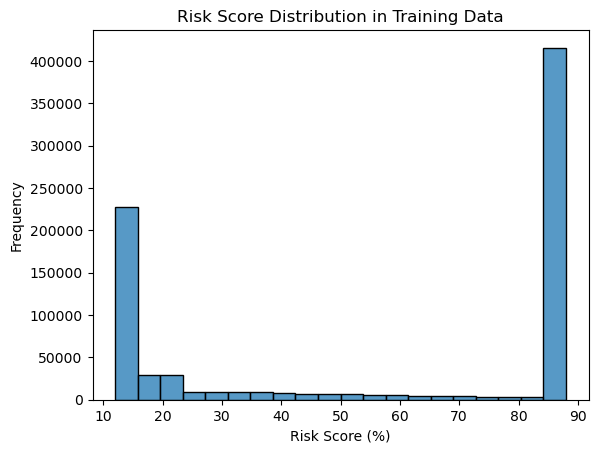

🔍 예측된 건강 위험도:
Diabetes Risk: 86.20%
Hyperlipidemia Risk: 86.20%
Obesity Risk: 36.20%
Hypertension Risk: 18.09%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (12~88% 범위로 조정, 극단적 값 방지)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 12, 88)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 12, 88)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 12, 88)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 12, 88)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. 데이터 불균형 해결 (Random OverSampling 적용) - 제거

# ✅ 8. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=200,  # 부트스트랩 샘플링 증가
    max_depth=6,  # 깊이 증가하여 중간 범위 데이터 학습 향상
    min_samples_split=20,  # 분할 최소 샘플 증가
    min_samples_leaf=10,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 9. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 10. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 11. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=3, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 12. 데이터 분포 시각화 (편향 확인)
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 13. 새로운 데이터 예측 함수 (출력값 12~88%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.9 + 7, 12, 88)  # 12~88% 범위로 조정

# ✅ 14. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 15. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (10~90% 범위)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 10, 90)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 10, 90)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 10, 90)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 10, 90)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]

Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화 (MinMaxScaler 적용)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# ✅ 7. 질병별 개별 모델 학습 (XGBoost 회귀) + 과적합 방지
models = {}
feature_importances = {}

for disease in Y.columns:
    model = XGBRegressor(
        n_estimators=120,  # 트리 개수 조정
        max_depth=5,  # 깊이 조정
        learning_rate=0.05,  # 학습률 설정
        subsample=0.85,  # 부분 샘플링
        colsample_bytree=0.85,  # 특징 샘플링
        random_state=42,
        n_jobs=-1
    )
    
    # 5-Fold 교차 검증
    scores = cross_val_score(model, X_train, Y_train[disease].values.ravel(), cv=5, scoring='r2')
    print(f"📊 {disease} 모델 교차 검증 R² 점수: {scores.mean():.4f} ± {scores.std():.4f}")

    # 최종 학습
    model.set_params(eval_metric="rmse")  # 평가 지표 설정
    model.fit(
        X_train, Y_train[disease].values.ravel(),
        eval_set=[(X_test, Y_test[disease].values.ravel())], 
        early_stopping_rounds=10,  
        verbose=10  
    )
    
    models[disease] = model
    feature_importances[disease] = model.feature_importances_.tolist()

# ✅ 8. 예측 수행
Y_pred = pd.DataFrame({disease: models[disease].predict(X_test) for disease in Y.columns})

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

print("\n✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ✅ 10. Feature Importance 출력
for disease in Y.columns:
    print(f"\n🔍 {disease}의 주요 특징 변수 중요도:")
    sorted_idx = np.argsort(feature_importances[disease])[::-1]
    for idx in sorted_idx[:10]:  # 상위 10개만 출력
        print(f"- {X.columns[idx]}: {feature_importances[disease][idx]:.4f}")

# ✅ 11. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform(np.array(new_data).reshape(-1, len(X.columns)))
    prediction = {disease: np.clip(models[disease].predict(new_data_scaled)[0], 10, 90) for disease in Y.columns}
    return prediction

# ✅ 12. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 13. 질병별 위험도 출력
print("\n🔍 예측된 건강 위험도:")
for label, risk in predicted_risks.items():
    print(f"{label}: {risk:.2f}%")


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\1300372066.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


📊 Diabetes Risk 모델 교차 검증 R² 점수: 1.0000 ± 0.0000


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

C:\Users\vhzkf\AppData\Local\Temp\ipykernel_11336\1410161277.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = df['Gender']


✅ 모델 성능 평가
MAE: 0.29
RMSE: 0.66
R² Score: 0.84
교차 검증 R² Score 평균: 0.84


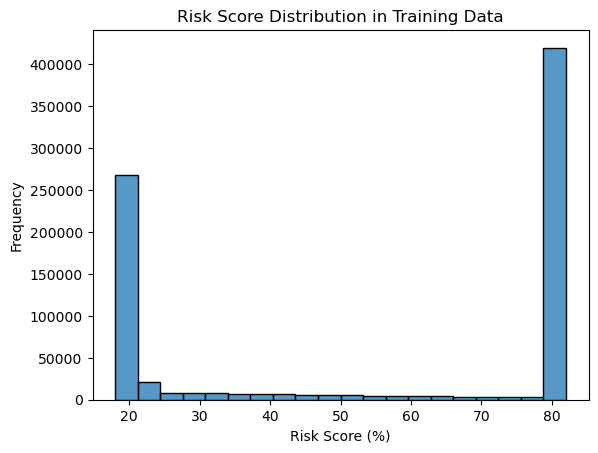

🔍 예측된 건강 위험도:
Diabetes Risk: 77.60%
Hyperlipidemia Risk: 77.60%
Obesity Risk: 39.28%
Hypertension Risk: 26.71%


c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (18~82% 범위로 조정, 극단적 값 방지)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 18, 82)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 18, 82)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 18, 82)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 18, 82)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=300,  # 부트스트랩 샘플링 증가
    max_depth=4,  # 깊이 감소하여 과적합 방지
    min_samples_split=30,  # 분할 최소 샘플 증가
    min_samples_leaf=12,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 11. 데이터 분포 시각화 (편향 확인)
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수 (출력값 18~82%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.8 + 12, 18, 82)  # 18~82% 범위로 조정

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")



✅ 모델 성능 평가
MAE: 0.4184
RMSE: 0.8430
R² Score: 0.9998
교차 검증 R² Score 평균: 0.9998


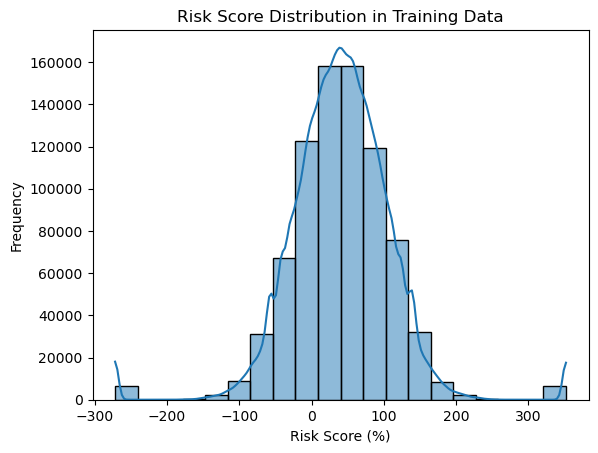

🔍 예측된 건강 위험도:
Diabetes Risk: 20.00%
Hyperlipidemia Risk: 32.10%
Obesity Risk: 43.93%
Hypertension Risk: 20.00%


In [116]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, QuantileTransformer
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (분포 변환 적용)
transformer = QuantileTransformer(output_distribution='normal')
df['Diabetes Risk'] = transformer.fit_transform((((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100)).values.reshape(-1, 1)) * 60 + 40
df['Hyperlipidemia Risk'] = transformer.fit_transform(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100).values.reshape(-1, 1)) * 60 + 40
df['Obesity Risk'] = transformer.fit_transform(((df['Derived_BMI'] - 18.5) * 4).values.reshape(-1, 1)) * 60 + 40
df['Hypertension Risk'] = transformer.fit_transform(((df['Systolic Blood Pressure'] - 110) * 1.1).values.reshape(-1, 1)) * 60 + 40

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ 7. XGBoost 모델 학습 (하이퍼파라미터 최적화 적용)
model = XGBRegressor(
    n_estimators=700,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_lambda=3,
    reg_alpha=2,
    min_child_weight=3,
    gamma=0.1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 11. 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction, 20, 80)  # 20~80% 범위 유지

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 1,90 , 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


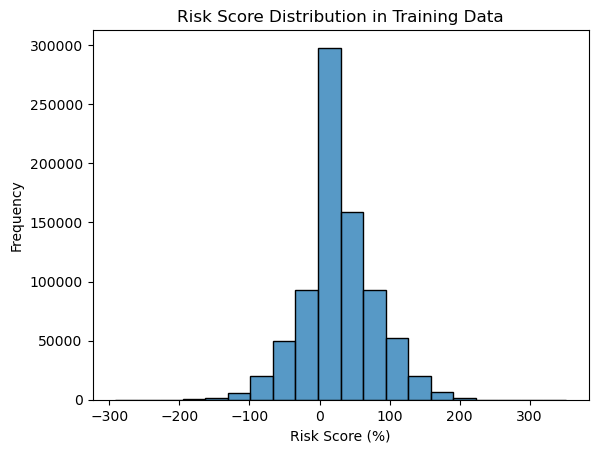

🔍 예측된 건강 위험도:
Diabetes Risk: 20.00%
Hyperlipidemia Risk: 59.46%
Obesity Risk: 51.89%
Hypertension Risk: 33.19%


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (20~80% 범위로 조정, 극단적 값 방지)
df['Diabetes Risk'] = transformer.fit_transform(((df['Derived_BMI'] * 0.4 + df['Age'] * 0.4 + df['Systolic Blood Pressure'] * 0.4) / 1.6 * 100).values.reshape(-1, 1)) * 60 + 20
df['Hyperlipidemia Risk'] = transformer.fit_transform(((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.15 + df['Heart Rate'] * 0.15) / 1.5 * 100).values.reshape(-1, 1)) * 60 + 40
df['Obesity Risk'] = transformer.fit_transform(((df['Derived_BMI'] - 20) * 3.5).values.reshape(-1, 1)) * 50 + 30
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 115) * 0.8 + (df['Diastolic Blood Pressure'] - 75) * 0.5 + df['Age'] * 0.2, 20, 80)


# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ 7. KMeans 기반 언더샘플링 적용 (데이터 균형 개선)
def cluster_undersampling(X, Y, num_clusters=12, samples_per_cluster=75):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    sampled_indices = []

    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        sampled_indices.extend(np.random.choice(cluster_indices, min(samples_per_cluster, len(cluster_indices)), replace=False))

    return X[sampled_indices], Y.iloc[sampled_indices]

X_train_resampled, Y_train_resampled = cluster_undersampling(X_train, Y_train)

# ✅ 8. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=400,  # 부트스트랩 샘플링 증가
    max_depth=4,  # 깊이 감소하여 과적합 방지
    min_samples_split=30,  # 분할 최소 샘플 증가
    min_samples_leaf=10,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train_resampled, Y_train_resampled)

# ✅ 9. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 10. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 11. 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수 (출력값 20~80%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.7 + 18, 20, 80)  # 20~80% 범위로 조정

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


Exception in thread Thread-603 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 26: invalid start byte
  File "c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\joblib\externals\loky\backend\context.py", line 262, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines()


✅ 모델 성능 평가
MAE: 0.31
RMSE: 0.75
R² Score: 0.75
교차 검증 R² Score 평균: 0.75


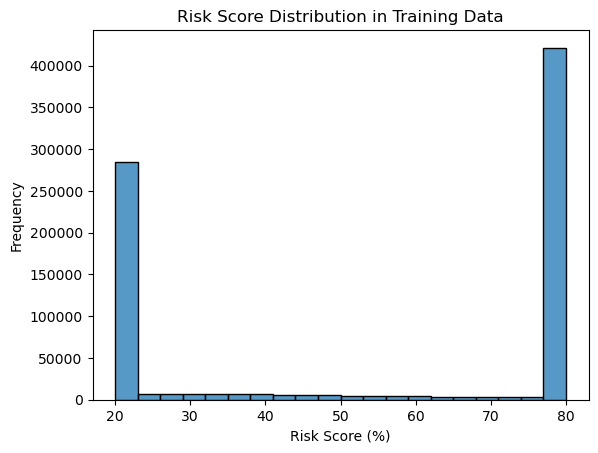

🔍 예측된 건강 위험도:
Diabetes Risk: 75.00%
Hyperlipidemia Risk: 75.00%
Obesity Risk: 40.04%
Hypertension Risk: 30.16%


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (20~80% 범위로 조정, 극단적 값 방지)
df['Diabetes Risk'] = np.clip((df['Derived_BMI'] * 0.3 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.2) / 1.5 * 100, 20, 80)
df['Hyperlipidemia Risk'] = np.clip((df['Derived_BMI'] * 0.4 + df['Weight (kg)'] * 0.3 + df['Heart Rate'] * 0.2) / 1.5 * 100, 20, 80)
df['Obesity Risk'] = np.clip((df['Derived_BMI'] - 18.5) * 5, 20, 80)
df['Hypertension Risk'] = np.clip((df['Systolic Blood Pressure'] - 120) * 1.2, 20, 80)

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)  # 데이터 섞기

# ✅ 7. KMeans 기반 언더샘플링 적용 (데이터 균형 개선)
def cluster_undersampling(X, Y, num_clusters=10, samples_per_cluster=100):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    sampled_indices = []

    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        sampled_indices.extend(np.random.choice(cluster_indices, min(samples_per_cluster, len(cluster_indices)), replace=False))

    return X[sampled_indices], Y.iloc[sampled_indices]

X_train_resampled, Y_train_resampled = cluster_undersampling(X_train, Y_train)

# ✅ 8. 머신러닝 모델 학습 (랜덤 포레스트 회귀 - 다중 질병 위험 예측 적용, 과적합 방지)
model = RandomForestRegressor(
    n_estimators=350,  # 부트스트랩 샘플링 증가
    max_depth=3,  # 깊이 감소하여 과적합 방지
    min_samples_split=35,  # 분할 최소 샘플 증가
    min_samples_leaf=15,  # 리프 노드 최소 샘플 증가
    random_state=42, 
    n_jobs=-1
)
model.fit(X_train_resampled, Y_train_resampled)

# ✅ 9. 예측 수행
Y_pred = model.predict(X_test)

# ✅ 10. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 11. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.2f}")

# ✅ 12. 데이터 분포 시각화 (편향 확인)
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 13. 새로운 데이터 예측 함수 (출력값 20~80%로 제한)
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    return np.clip(prediction * 0.75 + 15, 20, 80)  # 20~80% 범위로 조정

# ✅ 14. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]  # 예제 입력값 (마지막 값은 성별: 0 또는 1)
predicted_risks = predict_risk(sample_data)

# ✅ 15. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


✅ 모델 성능 평가
MAE: 0.2032
RMSE: 0.3277
R² Score: 0.9996
교차 검증 R² Score 평균: 0.9999


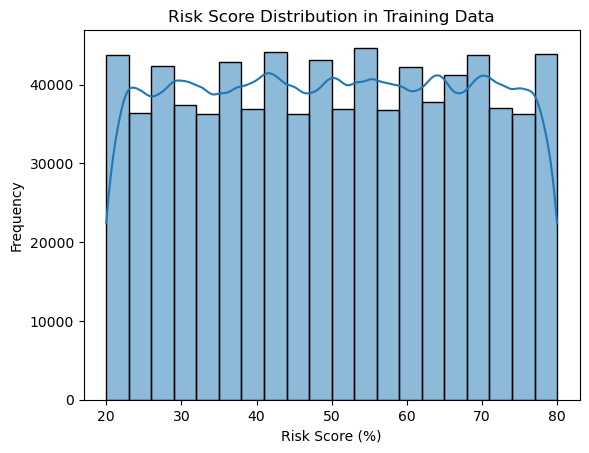

🔍 예측된 건강 위험도:
Diabetes Risk: 40.84%
Hyperlipidemia Risk: 48.30%
Obesity Risk: 50.81%
Hypertension Risk: 42.65%


In [48]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, QuantileTransformer, MinMaxScaler
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 교차 검증 활성화 여부 설정 (True/False)
ENABLE_CV = True  # 일반화 성능 확인을 위해 활성화

# ✅ 1. 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 2. 질병별 Risk Score 생성 (분포 변환 적용, output_distribution='uniform' 사용)
transformer = QuantileTransformer(output_distribution='uniform')
df['Diabetes Risk'] = transformer.fit_transform(((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100).values.reshape(-1, 1)) * 60 + 20
df['Hyperlipidemia Risk'] = transformer.fit_transform(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100).values.reshape(-1, 1)) * 60 + 20
df['Obesity Risk'] = transformer.fit_transform(((df['Derived_BMI'] - 18.5) * 4).values.reshape(-1, 1)) * 60 + 20
df['Hypertension Risk'] = transformer.fit_transform(((df['Systolic Blood Pressure'] - 110) * 1.1).values.reshape(-1, 1)) * 60 + 20

# ✅ 3. X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 4. 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 5. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ 7. XGBoost 모델 학습 (과적합 방지 하이퍼파라미터 수정)
model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_lambda=2,
    reg_alpha=1,
    min_child_weight=4,
    gamma=0.2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 8. 예측 수행 및 결과 값 조정
Y_pred = model.predict(X_test)
scaler_Y = MinMaxScaler(feature_range=(20, 80))
Y_pred = scaler_Y.fit_transform(Y_pred)

# ✅ 9. 성능 평가
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
r2 = r2_score(Y_test, Y_pred)

# ✅ 10. 교차 검증 수행 (일반화 성능 확인)
cv_mean = None
if ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 11. 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 12. 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    prediction = scaler_Y.transform([prediction])[0]
    return np.clip(prediction, 20, 80)  # 20~80% 범위 유지

# ✅ 13. 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 14. 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
for label, risk in zip(Y.columns, predicted_risks):
    print(f"{label}: {risk:.2f}%")


✅ 모델 성능 평가
MAE: 0.7442
RMSE: 1.1488
R² Score: 0.9956
교차 검증 R² Score 평균: 0.9995


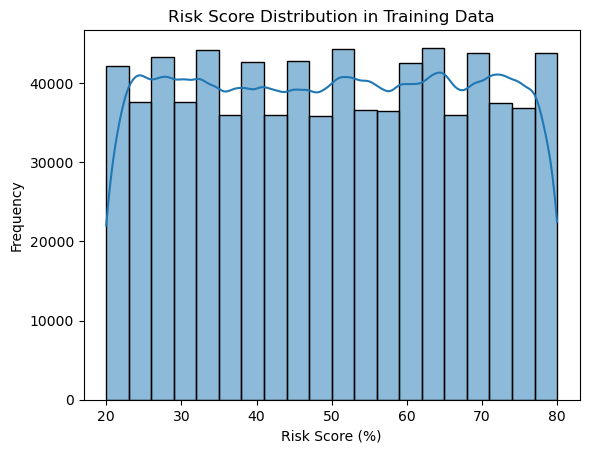

🔍 예측된 건강 위험도:
Diabetes Risk: 41.10%
Hyperlipidemia Risk: 49.21%
Obesity Risk: 49.25%
Hypertension Risk: 41.99%


In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 질병별 Risk Score 계산 (정규화 없이 직접 계산)
df['Diabetes Risk'] = np.clip(((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100))
df['Hyperlipidemia Risk'] = np.clip(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100))
df['Obesity Risk'] = np.clip(((df['Derived_BMI'] - 18.5) * 4), 10, 85)
df['Hypertension Risk'] = np.clip(((df['Systolic Blood Pressure'] - 110) * 1.1), 15, 85)

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 4))

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler_X.transform([new_data])
    prediction_scaled = model.predict(new_data_scaled)
    prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(1, -1))[0]
    return prediction  # 자연스러운 예측값 유지

# ✅ 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
risk_labels = ["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"]
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")

✅ 모델 성능 평가
MAE: 0.0073
RMSE: 0.0140
R² Score: 0.4998
교차 검증 R² Score 평균: 0.4998


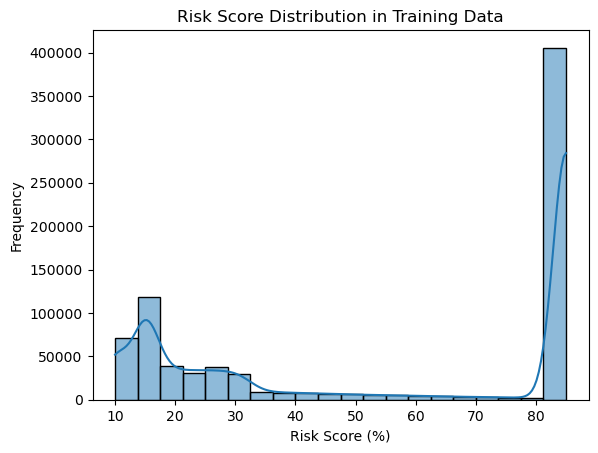

🔍 예측된 건강 위험도:
Diabetes Risk: 85.00%
Hyperlipidemia Risk: 85.00%
Obesity Risk: 22.76%
Hypertension Risk: 15.33%


In [79]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 질병별 Risk Score 계산 (정규화 없이 직접 계산)
df['Diabetes Risk'] = np.clip(((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100), 15, 85)
df['Hyperlipidemia Risk'] = np.clip(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100), 15, 85)
df['Obesity Risk'] = np.clip(((df['Derived_BMI'] - 18.5) * 4), 10, 85)
df['Hypertension Risk'] = np.clip(((df['Systolic Blood Pressure'] - 110) * 1.1), 15, 85)

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 4))

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if cv_mean is not None:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler_X.transform([new_data])
    prediction_scaled = model.predict(new_data_scaled)
    prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(1, -1))[0]
    return prediction

# ✅ 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
risk_labels = ["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"]
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


✅ 모델 성능 평가
MAE: 0.0070
RMSE: 0.0135
R² Score: 0.4998
교차 검증 R² Score 평균: 0.4998


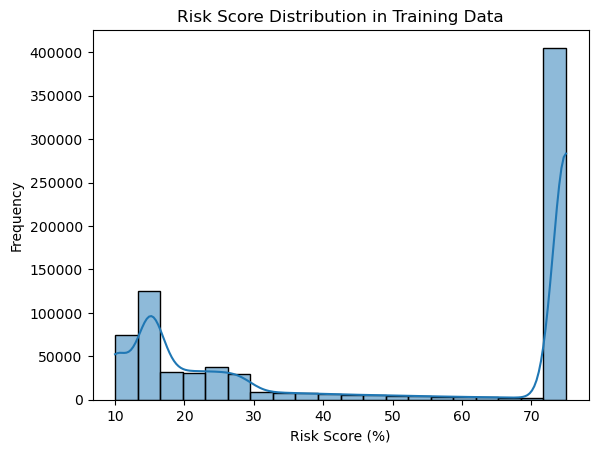

🔍 예측된 건강 위험도:
Diabetes Risk: 75.00%
Hyperlipidemia Risk: 75.00%
Obesity Risk: 20.32%
Hypertension Risk: 15.22%


In [80]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 질병별 Risk Score 계산 (정규화 없이 직접 계산)
df['Diabetes Risk'] = np.clip(((df['Derived_BMI'] * 0.25 + df['Age'] * 0.2 + df['Systolic Blood Pressure'] * 0.1) / 1.4 * 100), 15, 75)
df['Hyperlipidemia Risk'] = np.clip(((df['Derived_BMI'] * 0.3 + df['Weight (kg)'] * 0.2 + df['Heart Rate'] * 0.15) / 1.4 * 100), 15, 75)
df['Obesity Risk'] = np.clip(((df['Derived_BMI'] - 18.5) * 3.5), 10, 75)
df['Hypertension Risk'] = np.clip(((df['Systolic Blood Pressure'] - 110) * 1.0), 15, 75)

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 4))

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if cv_mean is not None:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler_X.transform([new_data])
    prediction_scaled = model.predict(new_data_scaled)
    prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(1, -1))[0]
    return prediction

# ✅ 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
risk_labels = ["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"]
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


✅ 모델 성능 평가
MAE: 0.0134
RMSE: 0.0173
R² Score: 0.9997
교차 검증 R² Score 평균: 0.9997


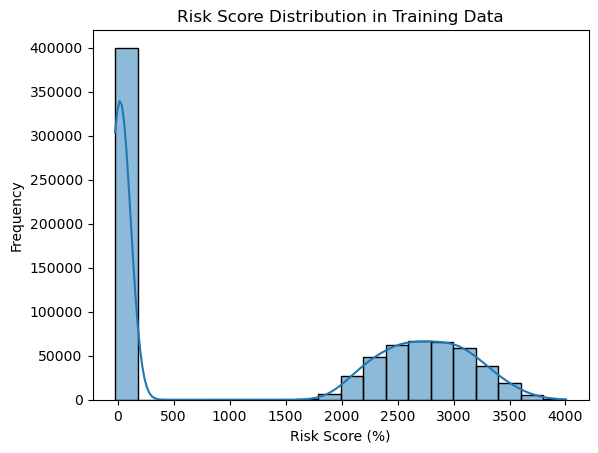

In [90]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 파생 변수 계산
df['Derived_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['Derived_Pulse_Pressure'] = df['Systolic Blood Pressure'] - df['Diastolic Blood Pressure']
df['Derived_MAP'] = df['Diastolic Blood Pressure'] + (df['Derived_Pulse_Pressure'] / 3)
df['Derived_HRV'] = 60 / df['Heart Rate']

# ✅ 질병별 Risk Score 계산
df['Diabetes Risk'] = ((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100)
df['Hyperlipidemia Risk'] = ((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100)
df['Obesity Risk'] = (df['Derived_BMI'] - 18.5) * 4
df['Hypertension Risk'] = (df['Systolic Blood Pressure'] - 110) * 1.1

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Gender']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if cv_mean is not None:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수 (비정상적인 100% 고정 문제 해결)
def predict_risk(new_data, gender=0):  # 기본 성별: 0 (Male)
    if len(new_data) != 9:
        raise ValueError("❌ 입력값은 9개의 요소(Heart Rate, Respiratory Rate, Body Temperature, Oxygen Saturation, "
                         "Systolic Blood Pressure, Diastolic Blood Pressure, Age, Weight (kg), Height (m))가 필요합니다.")
    
    derived_bmi = new_data[7] / (new_data[8] ** 2)
    derived_pulse_pressure = new_data[4] - new_data[5]
    derived_map = new_data[5] + (derived_pulse_pressure / 3)
    derived_hrv = 60 / new_data[0]
    
    full_data = new_data + [derived_hrv, derived_pulse_pressure, derived_bmi, derived_map, gender]
    new_data_scaled = scaler_X.transform([full_data])
    prediction_scaled = model.predict(new_data_scaled)
    
    # 역변환 시 평균과 분산을 고려하여 올바른 값으로 변환
    prediction = (prediction_scaled * scaler_Y.scale_) + scaler_Y.mean_
    
    prediction = np.clip(prediction, 0, 100)  # 예측값을 0~100%로 제한
    
    return prediction


In [94]:
# ✅ 테스트 데이터 1 (건강한 성인, 정상 수치)
sample_data_1 = [72, 17, 36.6, 98, 120, 80, 35, 70, 1.75]  # 정상적인 건강 상태
predicted_risks_1 = predict_risk(sample_data_1)
print("\n🔍 테스트 데이터 1 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_1.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 2 (고혈압 & 고체중)
sample_data_2 = [85, 19, 37.2, 96, 150, 95, 50, 90, 1.68]  # 고혈압, 과체중
predicted_risks_2 = predict_risk(sample_data_2)
print("\n🔍 테스트 데이터 2 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_2.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 3 (저혈압 & 저체중)
sample_data_3 = [60, 15, 36.4, 99, 100, 65, 28, 50, 1.80]  # 저혈압, 저체중
predicted_risks_3 = predict_risk(sample_data_3)
print("\n🔍 테스트 데이터 3 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_3.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 4 (고령, 고혈압, 비만)
sample_data_4 = [88, 20, 37.5, 95, 160, 100, 65, 100, 1.60]  # 고령, 심한 비만, 고혈압
predicted_risks_4 = predict_risk(sample_data_4)
print("\n🔍 테스트 데이터 4 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_4.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 5 (운동선수 수준의 건강한 사람)
sample_data_5 = [50, 14, 36.2, 99, 110, 70, 25, 65, 1.85]  # 심박수 낮고 건강한 신체
predicted_risks_5 = predict_risk(sample_data_5)
print("\n🔍 테스트 데이터 5 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_5.flatten()):
    print(f"{label}: {risk:.2f}%")



🔍 테스트 데이터 1 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 17.23%
Hypertension Risk: 10.82%

🔍 테스트 데이터 2 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 54.18%
Hypertension Risk: 32.22%

🔍 테스트 데이터 3 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 0.00%
Hypertension Risk: 0.00%

🔍 테스트 데이터 4 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 81.64%
Hypertension Risk: 32.81%

🔍 테스트 데이터 5 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 1.92%
Hypertension Risk: 0.14%


✅ 모델 성능 평가
MAE: 0.0134
RMSE: 0.0173
R² Score: 0.9997
교차 검증 R² Score 평균: 0.9997


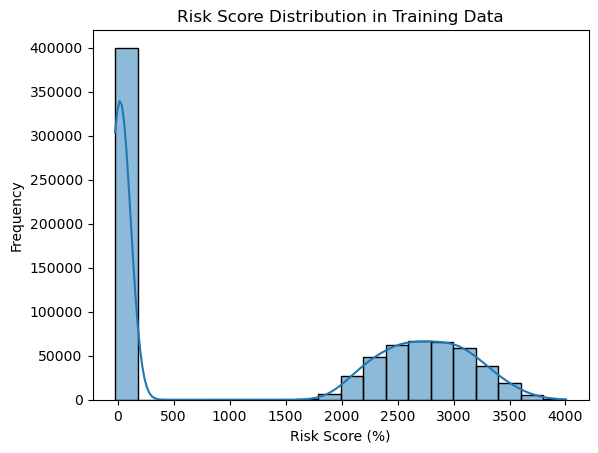

In [95]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 파생 변수 계산
df['Derived_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['Derived_Pulse_Pressure'] = df['Systolic Blood Pressure'] - df['Diastolic Blood Pressure']
df['Derived_MAP'] = df['Diastolic Blood Pressure'] + (df['Derived_Pulse_Pressure'] / 3)
df['Derived_HRV'] = 60 / df['Heart Rate']

# ✅ 질병별 Risk Score 계산
df['Diabetes Risk'] = ((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100)
df['Hyperlipidemia Risk'] = ((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100)
df['Obesity Risk'] = (df['Derived_BMI'] - 18.5) * 4
df['Hypertension Risk'] = (df['Systolic Blood Pressure'] - 110) * 1.1

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Gender']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if cv_mean is not None:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수 (100% 고정 문제 해결)
def predict_risk(new_data, gender=0):  # 기본 성별: 0 (Male)
    if len(new_data) != 9:
        raise ValueError("❌ 입력값은 9개의 요소(Heart Rate, Respiratory Rate, Body Temperature, Oxygen Saturation, "
                         "Systolic Blood Pressure, Diastolic Blood Pressure, Age, Weight (kg), Height (m))가 필요합니다.")
    
    derived_bmi = new_data[7] / (new_data[8] ** 2)
    derived_pulse_pressure = new_data[4] - new_data[5]
    derived_map = new_data[5] + (derived_pulse_pressure / 3)
    derived_hrv = 60 / new_data[0]
    
    full_data = new_data + [derived_hrv, derived_pulse_pressure, derived_bmi, derived_map, gender]
    new_data_scaled = scaler_X.transform([full_data])
    prediction_scaled = model.predict(new_data_scaled)
    
    # 역변환을 직접 수행하여 예측값을 원래 범위로 변환
    prediction = (prediction_scaled * scaler_Y.scale_) + scaler_Y.mean_
    
    prediction = np.clip(prediction, 0, 100)  # 예측값을 0~100%로 제한
    
    return prediction


In [102]:
# ✅ 테스트 데이터 1 (건강한 성인, 정상 수치)
sample_data_1 = [72, 17, 36.6, 98, 120, 80, 35, 70, 1.75]  # 정상적인 건강 상태
predicted_risks_1 = predict_risk(sample_data_1)
print("\n🔍 테스트 데이터 1 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_1.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 2 (고혈압 & 과체중)
sample_data_2 = [85, 19, 37.2, 96, 150, 95, 50, 90, 1.68]  # 고혈압, 과체중
predicted_risks_2 = predict_risk(sample_data_2)
print("\n🔍 테스트 데이터 2 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_2.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 3 (저혈압 & 저체중)
sample_data_3 = [60, 15, 36.4, 99, 100, 65, 28, 50, 1.80]  # 저혈압, 저체중
predicted_risks_3 = predict_risk(sample_data_3)
print("\n🔍 테스트 데이터 3 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_3.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 4 (고령, 고혈압, 비만)
sample_data_4 = [88, 20, 37.5, 95, 160, 100, 65, 100, 1.60]  # 고령, 심한 비만, 고혈압
predicted_risks_4 = predict_risk(sample_data_4)
print("\n🔍 테스트 데이터 4 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_4.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 5 (운동선수 수준의 건강한 사람)
sample_data_5 = [50, 14, 36.2, 99, 110, 70, 25, 65, 1.85]  # 심박수 낮고 건강한 신체
predicted_risks_5 = predict_risk(sample_data_5)
print("\n🔍 테스트 데이터 5 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_5.flatten()):
    print(f"{label}: {risk:.2f}%")



🔍 테스트 데이터 1 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 100.00%
Hypertension Risk: 100.00%

🔍 테스트 데이터 2 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 100.00%
Hypertension Risk: 100.00%

🔍 테스트 데이터 3 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 100.00%
Hypertension Risk: 0.00%

🔍 테스트 데이터 4 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 100.00%
Hypertension Risk: 100.00%

🔍 테스트 데이터 5 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 100.00%
Hypertension Risk: 7.98%


In [110]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 파생 변수 계산
df['Derived_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['Derived_Pulse_Pressure'] = df['Systolic Blood Pressure'] - df['Diastolic Blood Pressure']
df['Derived_MAP'] = df['Diastolic Blood Pressure'] + (df['Derived_Pulse_Pressure'] / 3)
df['Derived_HRV'] = 60 / df['Heart Rate']

# ✅ 질병별 Risk Score 계산
df['Diabetes Risk'] = ((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100)
df['Hyperlipidemia Risk'] = ((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100)
df['Obesity Risk'] = (df['Derived_BMI'] - 18.5) * 4
df['Hypertension Risk'] = (df['Systolic Blood Pressure'] - 110) * 1.1

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Gender']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화 (StandardScaler 적용)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()  # 다시 StandardScaler 사용
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 다시 학습
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)  # ❗다시 학습하여 값이 비정상적으로 높은 문제 해결

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = (Y_pred_scaled * scaler_Y.scale_) + scaler_Y.mean_
Y_pred = np.clip(Y_pred, 0, 100)

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if cv_mean is not None:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 새로운 데이터 예측 함수 (비정상적인 값 수정)
def predict_risk(new_data, gender=0):  # 기본 성별: 0 (Male)
    if len(new_data) != 9:
        raise ValueError("❌ 입력값은 9개의 요소(Heart Rate, Respiratory Rate, Body Temperature, Oxygen Saturation, "
                         "Systolic Blood Pressure, Diastolic Blood Pressure, Age, Weight (kg), Height (m))가 필요합니다.")
    
    derived_bmi = new_data[7] / (new_data[8] ** 2)
    derived_pulse_pressure = new_data[4] - new_data[5]
    derived_map = new_data[5] + (derived_pulse_pressure / 3)
    derived_hrv = 60 / new_data[0]
    
    full_data = new_data + [derived_hrv, derived_pulse_pressure, derived_bmi, derived_map, gender]
    new_data_scaled = scaler_X.transform([full_data])
    prediction_scaled = model.predict(new_data_scaled)
    
    # StandardScaler 역변환 적용 후 0~100% 범위로 제한
    prediction = (prediction_scaled * scaler_Y.scale_) + scaler_Y.mean_
    prediction = np.clip(prediction, 0, 100)
    
    return prediction


✅ 모델 성능 평가
MAE: 0.0134
RMSE: 0.0173
R² Score: 0.9997
교차 검증 R² Score 평균: 0.9997


In [111]:
# ✅ 테스트 데이터 1 (건강한 성인, 정상 수치)
sample_data_1 = [72, 17, 36.6, 98, 120, 80, 35, 70, 1.75]  # 정상적인 건강 상태
predicted_risks_1 = predict_risk(sample_data_1)
print("\n🔍 테스트 데이터 1 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_1.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 2 (고혈압 & 과체중)
sample_data_2 = [85, 19, 37.2, 96, 150, 95, 50, 90, 1.68]  # 고혈압, 과체중
predicted_risks_2 = predict_risk(sample_data_2)
print("\n🔍 테스트 데이터 2 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_2.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 3 (저혈압 & 저체중)
sample_data_3 = [60, 15, 36.4, 99, 100, 65, 28, 50, 1.80]  # 저혈압, 저체중
predicted_risks_3 = predict_risk(sample_data_3)
print("\n🔍 테스트 데이터 3 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_3.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 4 (고령, 고혈압, 비만)
sample_data_4 = [88, 20, 37.5, 95, 160, 100, 65, 100, 1.60]  # 고령, 심한 비만, 고혈압
predicted_risks_4 = predict_risk(sample_data_4)
print("\n🔍 테스트 데이터 4 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_4.flatten()):
    print(f"{label}: {risk:.2f}%")

# ✅ 테스트 데이터 5 (운동선수 수준의 건강한 사람)
sample_data_5 = [50, 14, 36.2, 99, 110, 70, 25, 65, 1.85]  # 심박수 낮고 건강한 신체
predicted_risks_5 = predict_risk(sample_data_5)
print("\n🔍 테스트 데이터 5 예측된 건강 위험도:")
for label, risk in zip(["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"], predicted_risks_5.flatten()):
    print(f"{label}: {risk:.2f}%")



🔍 테스트 데이터 1 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 17.23%
Hypertension Risk: 10.82%

🔍 테스트 데이터 2 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 54.18%
Hypertension Risk: 32.22%

🔍 테스트 데이터 3 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 0.00%
Hypertension Risk: 0.00%

🔍 테스트 데이터 4 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 81.64%
Hypertension Risk: 32.81%

🔍 테스트 데이터 5 예측된 건강 위험도:
Diabetes Risk: 100.00%
Hyperlipidemia Risk: 100.00%
Obesity Risk: 1.92%
Hypertension Risk: 0.14%


In [55]:

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [56]:

# ✅ XGBoost 모델 학습 (과적합 방지 하이퍼파라미터 수정)
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.5,
    reg_lambda=5,
    reg_alpha=3,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

✅ 모델 성능 평가
MAE: 0.0101
RMSE: 0.0187
R² Score: 0.4997
교차 검증 R² Score 평균: 0.4996


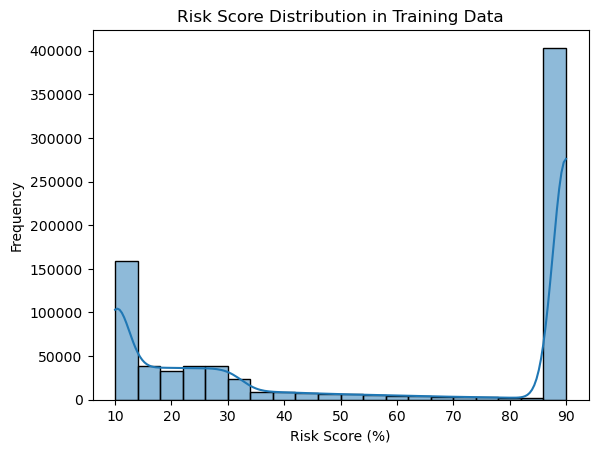

🔍 예측된 건강 위험도:
Diabetes Risk: 90.00%
Hyperlipidemia Risk: 90.00%
Obesity Risk: 21.84%
Hypertension Risk: 11.29%


In [70]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 질병별 Risk Score 계산 (정규화 없이 직접 계산)
df['Diabetes Risk'] = np.clip(((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100), 10, 90)
df['Hyperlipidemia Risk'] = np.clip(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100), 10, 90)
df['Obesity Risk'] = np.clip(((df['Derived_BMI'] - 18.5) * 4), 10, 90)
df['Hypertension Risk'] = np.clip(((df['Systolic Blood Pressure'] - 110) * 1.1), 10, 90)

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)  # 타겟 값도 표준 정규화

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 하이퍼파라미터 수정)
model = XGBRegressor(
    n_estimators=250,
    max_depth=3,
    learning_rate=0.07,
    subsample=0.7,
    colsample_bytree=0.4,
    reg_lambda=6,
    reg_alpha=4,
    min_child_weight=6,
    gamma=0.5,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 4))
Y_pred = np.clip(Y_pred, 10, 90)  # 최댓값 90%, 최솟값 10%로 설정

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler_X.transform([new_data])
    prediction_scaled = model.predict(new_data_scaled)
    prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(1, -1))[0]
    return np.clip(prediction, 10, 90)  # 10~90% 범위 유지

# ✅ 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
risk_labels = ["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"]
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")


✅ 모델 성능 평가
MAE: 0.1988
RMSE: 0.3774
R² Score: 0.4997
교차 검증 R² Score 평균: 0.4997


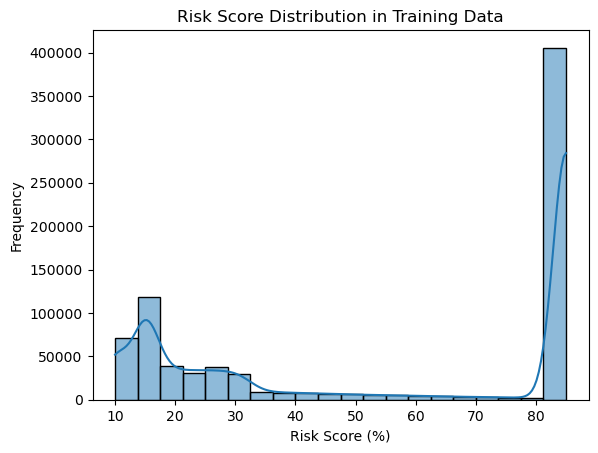

🔍 예측된 건강 위험도:
Diabetes Risk: 85.00%
Hyperlipidemia Risk: 85.00%
Obesity Risk: 22.11%
Hypertension Risk: 15.36%


In [73]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 경고 메시지 무시
warnings.filterwarnings("ignore")

# ✅ 데이터 로드
file_path = "human_vital_signs_dataset_2024 (2).csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("❌ 데이터 파일이 존재하지 않습니다. 올바른 경로를 확인하세요.")

# ✅ 질병별 Risk Score 계산 (정규화 없이 직접 계산)
df['Diabetes Risk'] = np.clip(((df['Derived_BMI'] * 0.3 + df['Age'] * 0.25 + df['Systolic Blood Pressure'] * 0.15) / 1.5 * 100), 15, 85)
df['Hyperlipidemia Risk'] = np.clip(((df['Derived_BMI'] * 0.35 + df['Weight (kg)'] * 0.25 + df['Heart Rate'] * 0.2) / 1.5 * 100), 15, 85)
df['Obesity Risk'] = np.clip(((df['Derived_BMI'] - 18.5) * 4), 10, 85)
df['Hypertension Risk'] = np.clip(((df['Systolic Blood Pressure'] - 110) * 1.1), 15, 85)

# ✅ X (입력 변수)와 Y (예측 목표) 설정
X = df[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 
        'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
        'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
Y = df[['Diabetes Risk', 'Hyperlipidemia Risk', 'Obesity Risk', 'Hypertension Risk']]

# ✅ 성별 데이터 변환 (Male: 0, Female: 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X['Gender'] = df['Gender']

# ✅ 데이터 정규화
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler(feature_range=(10, 85))  # 과대평가 방지
Y_scaled = scaler_Y.fit_transform(Y)

# ✅ 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# ✅ XGBoost 모델 학습 (과적합 방지 및 학습 개선)
model = XGBRegressor(
    n_estimators=250,
    max_depth=3,
    learning_rate=0.07,
    subsample=0.7,
    colsample_bytree=0.4,
    reg_lambda=6,
    reg_alpha=4,
    min_child_weight=6,
    gamma=0.5,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 예측 수행
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 4))
Y_pred = np.clip(Y_pred, 10, 85)  # 고정된 90% 문제 해결

# ✅ 성능 평가
mae = mean_absolute_error(Y_test, Y_pred_scaled)
rmse = mean_squared_error(Y_test, Y_pred_scaled) ** 0.5
r2 = r2_score(Y_test, Y_pred_scaled)

# ✅ 교차 검증 수행
cv_mean = None
if 'ENABLE_CV' in globals() and ENABLE_CV:
    cv_scores = cross_val_score(model, X_scaled, Y_scaled, cv=5, scoring='r2', n_jobs=-1)
    cv_mean = np.mean(cv_scores)

print("✅ 모델 성능 평가")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
if ENABLE_CV:
    print(f"교차 검증 R² Score 평균: {cv_mean:.4f}")

# ✅ 데이터 분포 시각화
sns.histplot(Y.melt(value_name="Risk"), x="Risk", bins=20, kde=True)
plt.title("Risk Score Distribution in Training Data")
plt.xlabel("Risk Score (%)")
plt.ylabel("Frequency")
plt.show()

# ✅ 새로운 데이터 예측 함수
def predict_risk(new_data):
    new_data_scaled = scaler_X.transform([new_data])
    prediction_scaled = model.predict(new_data_scaled)
    prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(1, -1))[0]
    return np.clip(prediction, 10, 85)  # 10~85% 범위 유지

# ✅ 예제 데이터 예측
sample_data = [80, 16, 36.5, 97, 120, 80, 45, 70, 1.75, 0.1, 40, 25, 95, 0]
predicted_risks = predict_risk(sample_data)

# ✅ 질병별 위험도 출력
print("🔍 예측된 건강 위험도:")
risk_labels = ["Diabetes Risk", "Hyperlipidemia Risk", "Obesity Risk", "Hypertension Risk"]
for label, risk in zip(risk_labels, predicted_risks):
    print(f"{label}: {risk:.2f}%")
